In [ ]:
#audio classification using mediapipe model

In [1]:
!pip install -q sounddevice==0.4.4
!pip install -q mediapipe==0.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 51.9 MB/s eta 0:00:00


In [2]:
!wget -O classifier.tflite -q https://storage.googleapis.com/mediapipe-models/audio_classifier/yamnet/float32/1/yamnet.tflite

In [3]:
import urllib

audio_file_name = 'speech_16000_hz_mono.wav'
url = f'https://storage.googleapis.com/mediapipe-assets/{audio_file_name}'
urllib.request.urlretrieve(url, audio_file_name)

('speech_16000_hz_mono.wav', <http.client.HTTPMessage at 0x7dd1570ec8e0>)

In [4]:
from IPython.display import Audio, display

file_name = 'speech_16000_hz_mono.wav'
display(Audio(file_name, autoplay=False))

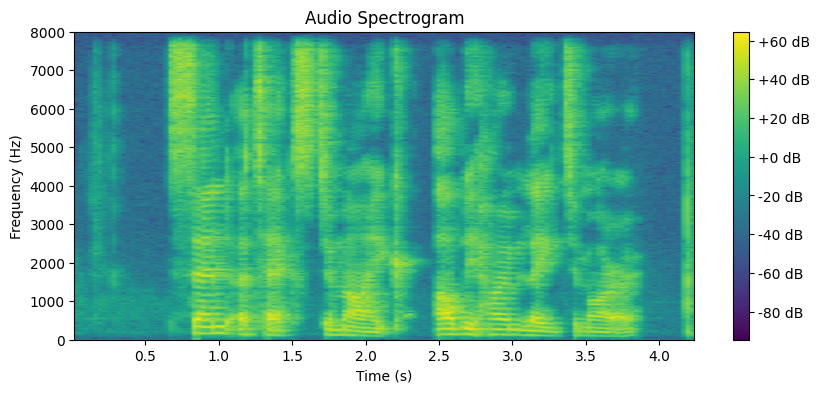

In [5]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np

# Load the audio file
file_name = 'speech_16000_hz_mono.wav'
sample_rate, audio_data = wavfile.read(file_name)

# Calculate and plot the spectrogram
plt.figure(figsize=(10, 4))
plt.specgram(audio_data, Fs=sample_rate, NFFT=1024, noverlap=512, cmap='viridis')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Audio Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()


In [6]:
import numpy as np

from mediapipe.tasks import python
from mediapipe.tasks.python.components import containers
from mediapipe.tasks.python import audio
from scipy.io import wavfile

# Customize and associate model for Classifier
base_options = python.BaseOptions(model_asset_path='classifier.tflite')
options = audio.AudioClassifierOptions(
    base_options=base_options, max_results=4)

# Create classifier, segment audio clips, and classify
with audio.AudioClassifier.create_from_options(options) as classifier:
  sample_rate, wav_data = wavfile.read(audio_file_name)
  audio_clip = containers.AudioData.create_from_array(
      wav_data.astype(float) / np.iinfo(np.int16).max, sample_rate)
  classification_result_list = classifier.classify(audio_clip)

  assert(len(classification_result_list) == 5)

# Iterate through clips to display classifications
  for idx, timestamp in enumerate([0, 975, 1950, 2925]):
    classification_result = classification_result_list[idx]
    top_category = classification_result.classifications[0].categories[0]
    print(f'Timestamp {timestamp}: {top_category.category_name} ({top_category.score:.2f})')

Timestamp 0: Speech (0.92)
Timestamp 975: Speech (0.99)
Timestamp 1950: Speech (0.98)
Timestamp 2925: Speech (1.00)
